In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
#from IPython.display import Image

In [3]:
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

x_train=x_train.reshape(-1, 28, 28, 1) #(데이터 수, 행, 열, 색상 종류)
x_test=x_test.reshape(-1, 28, 28, 1)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

x_train = x_train.astype(np.float32) / 255.0  #0~1 정규화
x_test = x_test.astype(np.float32) / 255.0

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


In [6]:
cnn = Sequential()

cnn.add(Conv2D(input_shape=(28,28,1), kernel_size=(3,3),filters=32, activation='relu'))
cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

# Optimizers :SGD, Adam, RMSprop
- Optimizer는 딥러닝에서 Network가 빠르고 정확하게 학습하는 것을 목표로 한다. 
- 주로 Gradient Descent Algorithm을 기반으로한 SGD에서 변형된 여러종류의 Optimizer가 사용되고 있다
https://onevision.tistory.com/category/Algorithm/Deep%20Learning

In [7]:
cnn.compile(loss='sparse_categorical_crossentropy',
            optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               1179776   
                                                      

In [5]:
hist = cnn.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test))
#468.75=60000/128, batch_size : 전체 데이터를 batch_size 만큼 나누어 그결과 만큼 진행 후 w, b관 업데이터 

Epoch 1/30
469/469 [==============================] - 48s 101ms/step - loss: 0.5545 - accuracy: 0.8054 - val_loss: 0.3478 - val_accuracy: 0.8727
Epoch 2/30
469/469 [==============================] - 47s 101ms/step - loss: 0.3569 - accuracy: 0.8723 - val_loss: 0.2976 - val_accuracy: 0.8900
Epoch 3/30
469/469 [==============================] - 48s 102ms/step - loss: 0.3066 - accuracy: 0.8892 - val_loss: 0.2666 - val_accuracy: 0.9033
Epoch 4/30
469/469 [==============================] - 48s 102ms/step - loss: 0.2749 - accuracy: 0.8999 - val_loss: 0.2479 - val_accuracy: 0.9098
Epoch 5/30
469/469 [==============================] - 48s 103ms/step - loss: 0.2519 - accuracy: 0.9088 - val_loss: 0.2377 - val_accuracy: 0.9125
Epoch 6/30
469/469 [==============================] - 51s 109ms/step - loss: 0.2318 - accuracy: 0.9154 - val_loss: 0.2374 - val_accuracy: 0.9130
Epoch 7/30
469/469 [==============================] - 50s 106ms/step - loss: 0.2157 - accuracy: 0.9182 - val_loss: 0.2280 - val_ac

In [6]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2825 - accuracy: 0.9317


[0.28254416584968567, 0.9316999912261963]

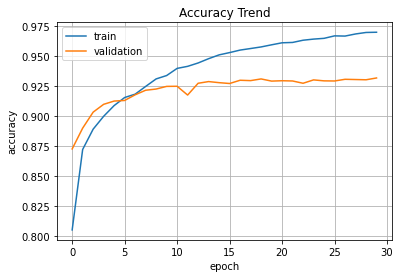

In [7]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

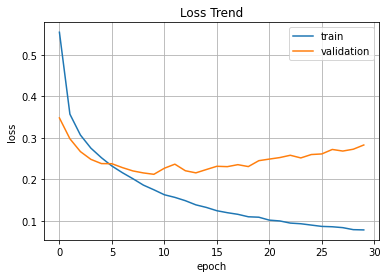

In [8]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()